# 1. Imports

In [41]:
# imports
import pandas as pd
import numpy  as np

import seaborn           as sb
import matplotlib.pyplot as plt

from sklearn                       import metrics
from sklearn.naive_bayes           import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection       import cross_val_score
from sklearn.model_selection       import train_test_split
from sklearn.utils                 import shuffle
from sklearn.preprocessing         import MinMaxScaler
from yellowbrick.classifier        import ConfusionMatrix

import warnings
warnings.filterwarnings("ignore")

# 2. Loading data

In [2]:
# Load dataset
df = pd.read_csv( 'datasets/wine.csv' )

df.head()

,Type,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 3. Data Preparation

## 3.1. Exploratory data analysis

In [11]:
# Data dimensions
print( 'Number of rows: ', df.shape[0] )
print( 'Number of columns: ', df.shape[1] )

Number of rows:  178
Number of columns:  14


In [9]:
# Descriptive analysis
df.describe()

,Type,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
# Data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    178 non-null    int64  
 1   v01     178 non-null    float64
 2   v02     178 non-null    float64
 3   v03     178 non-null    float64
 4   v04     178 non-null    float64
 5   v05     178 non-null    int64  
 6   v06     178 non-null    float64
 7   v07     178 non-null    float64
 8   v08     178 non-null    float64
 9   v09     178 non-null    float64
 10  v10     178 non-null    float64
 11  v11     178 non-null    float64
 12  v12     178 non-null    float64
 13  v13     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### 3.1.1. Visualization

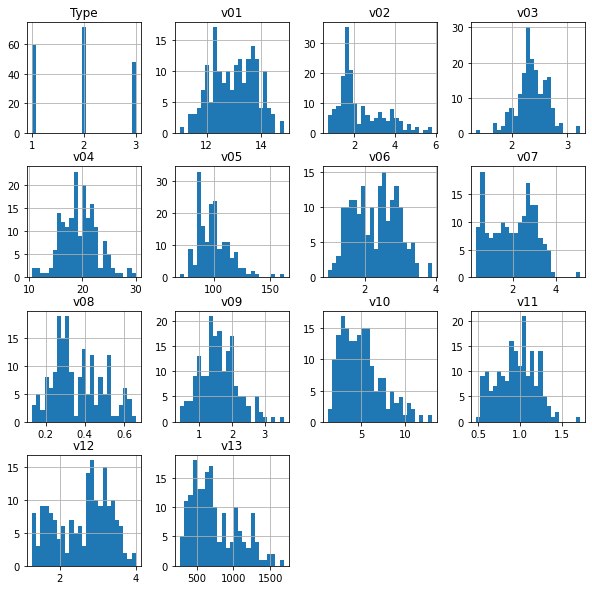

In [13]:
# histograms
df.hist( bins=25, figsize=(10,10) )
plt.show()

### 3.1.2. Correlation

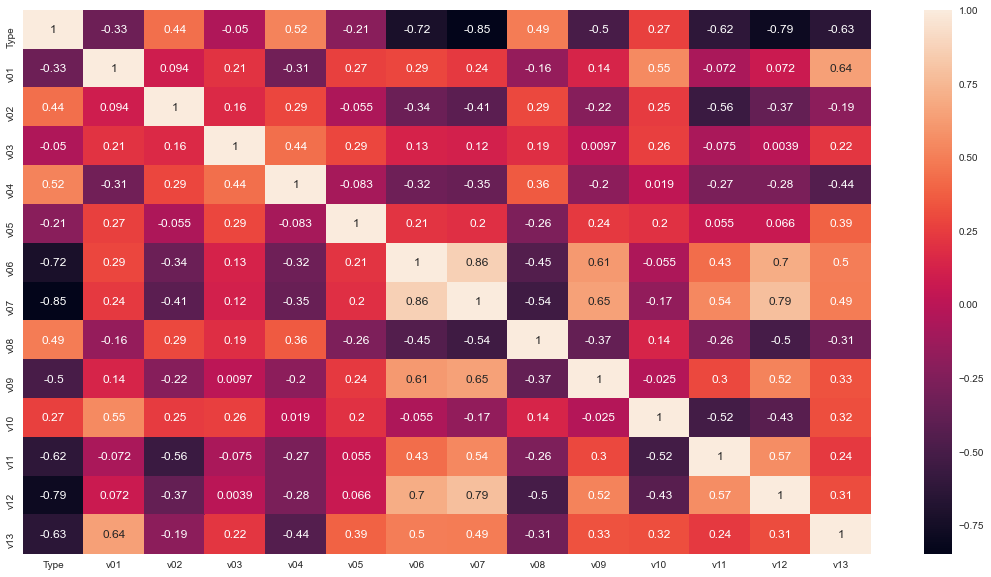

In [48]:
# ploting heatmap
plt.figure( figsize=(19,10), facecolor='white' )
sb.heatmap( df.corr(), annot=True )

## 3.2. Shuffle dataset

In [3]:
# shuffle
df = df.sample( frac = 1 ).reset_index()
df = df.drop( 'index', axis=1 )

## 3.3. Splitting dataset

In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2, random_state=40 )

## 3.4. Normalization

In [6]:
# Data normalization
norm = MinMaxScaler()

# Fit data
norm_fit = norm.fit( X_train )
X_train = norm_fit.transform( X_train )
X_test = norm_fit.transform( X_test )

# 4. Model Training

## 4.1. Naive Bayes

In [32]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit( X_train, y_train )

GaussianNB()

In [33]:
# Predict the response for test dataset
y_pred = gnb.predict( X_test )

# Model Accuracy
print('Accuracy: ', metrics.accuracy_score( y_test, y_pred ) )

# Confusion Matrix
print('Confusion Matrix: \n', metrics.confusion_matrix( y_test, y_pred ) )

Accuracy:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]


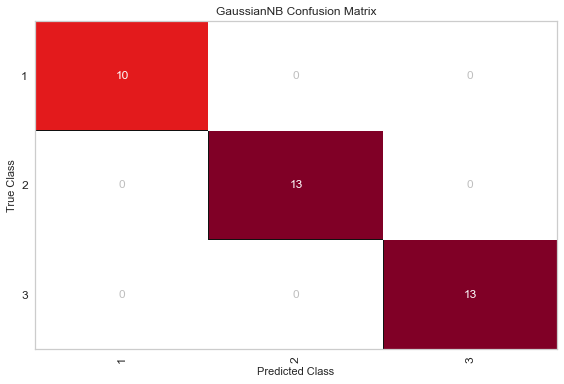

In [34]:
# Confusion Matrix with yellowbrick
v = ConfusionMatrix( GaussianNB() )
v.fit( X_train, y_train )
v.score( X_test, y_test )
v.poof()

# 4.1.1. Performance using cross validation

In [16]:
# Spliting data in features and target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Create a Gaussian Classifier
gnb = GaussianNB()

# Get model performance
n_scores = cross_val_score( gnb, X, y, cv=5, scoring='accuracy' )

print( 'Accuracy: ', np.mean( n_scores ) )
print( 'Scores: ', n_scores )

Accuracy:  0.9774603174603176
Scores:  [0.97222222 1.         0.97222222 1.         0.94285714]


## 4.2 Naive Bayes with LDA for Dimensionality reduction

In [35]:
# Initializa the LDA
lda = LinearDiscriminantAnalysis()

# Fitting the LDA model
X_train = lda.fit_transform( X_train, y_train )
X_test = lda.fit_transform( X_test, y_test )

In [36]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit( X_train, y_train )

GaussianNB()

In [37]:
# Predict the response for test dataset
y_pred = gnb.predict( X_test )

# Model Accuracy
print( 'Accuracy: ', metrics.accuracy_score( y_test, y_pred ) )

# Confusion Matrix
print( 'Confusion Matrix: \n', metrics.confusion_matrix( y_test, y_pred ) )

Accuracy:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]


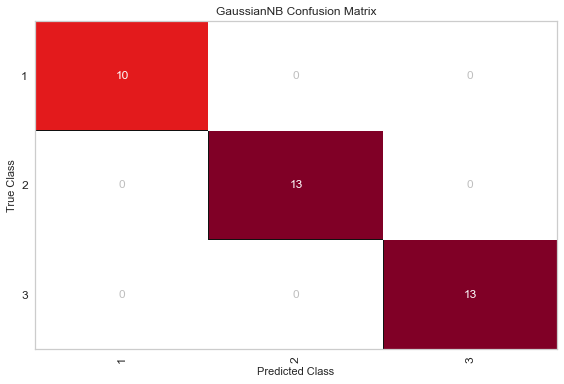

In [38]:
# Confusion Matrix with yellowbrick
v = ConfusionMatrix( GaussianNB() )
v.fit( X_train, y_train )
v.score( X_test, y_test )
v.poof()

# 4.2.1 Performance using cross validation

In [39]:
# Spliting data in features and target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Initialize the LDA
lda = LinearDiscriminantAnalysis()

# Fitting the LDA model
X = lda.fit_transform( X, y )

# Create a Gaussian Classifier
gnb = GaussianNB()

# Get model performance
n_scores = cross_val_score( gnb, X, y, cv=5, scoring='accuracy' )

print( 'Accuracy: ', np.mean( n_scores ) )
print( 'Scores: ', n_scores )

Accuracy:  1.0
Scores:  [1. 1. 1. 1. 1.]
